# Random Forest Analysis

In this notebook, we perform several Random Forest analysis using different modifications of the Higgs chalange dataset

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

import scikitplot as skplt
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate

#import tensorflow as tf
#from tensorflow import keras

In [3]:
# Load the data
data=pd.read_csv('C:/Users/luisg/OneDrive/Escritorio/Nucphys/ML course/project2/atlas-higgs-challenge-2014-v2.csv')
nan_data=pd.read_csv('C:/Users/luisg/OneDrive/Escritorio/Nucphys/ML course/project2/nan_data.csv')
mf_data=pd.read_csv('C:/Users/luisg/OneDrive/Escritorio/Nucphys/ML course/project2/most_frequent_data.csv')
mean_data=pd.read_csv('C:/Users/luisg/OneDrive/Escritorio/Nucphys/ML course/project2/mean_data.csv')
zero_data=pd.read_csv('C:/Users/luisg/OneDrive/Escritorio/Nucphys/ML course/project2/zero_data.csv')

Many of the features are not physical in nature but are related to the Kaggle database. These must be dropped.

In [4]:
data=data.drop(['EventId','KaggleWeight','Weight'],axis=1)              #Dropping spoureous and unphysical variables
nan_data=nan_data.drop(['Unnamed: 0','EventId','KaggleWeight','Weight'],axis=1)
mf_data=mf_data.drop(['EventId','KaggleWeight','Weight'],axis=1)
mean_data=mean_data.drop(['EventId','KaggleWeight','Weight'],axis=1)
zero_data=zero_data.drop(['EventId','KaggleWeight','Weight'],axis=1)

## Warning!

Scikit-learn data do not support nan values. There are several strategies to folow. First, we'll just remove every row that contains a nan

In [6]:
before=nan_data.shape[0]
nan_data=nan_data.dropna()
after=nan_data.shape[0]

print('The number of entries was reduced from',before,'to',after)

The number of entries was reduced from 465235 to 126865


The challenge data include a label already classifying the events as part of the train and the test data. In this analysis,we are using them as such.

In [5]:
#data_train=nan_data.loc[nan_data['KaggleSet']=='t'] #train-test split as default
#data_test=nan_data.loc[nan_data['KaggleSet']=='b']
mf_data_train=mf_data.loc[mf_data['KaggleSet']=='t'] 
mf_data_test=mf_data.loc[mf_data['KaggleSet']=='b']
mean_data_train=mean_data.loc[mf_data['KaggleSet']=='t'] 
mean_data_test=mean_data.loc[mf_data['KaggleSet']=='b']
zero_data_train=mean_data.loc[mf_data['KaggleSet']=='t'] 
zero_data_test=mean_data.loc[mf_data['KaggleSet']=='b']

In [6]:
mf_X_train=np.array(mf_data_train.drop(['Label','KaggleSet'],axis=1)) #Defining features
mf_y_str_train=np.array(mf_data_train['Label'])

mf_X_test=np.array(mf_data_test.drop(['Label','KaggleSet'],axis=1)) #Defining features
mf_y_str_test=np.array(mf_data_test['Label'])

mean_X_train=np.array(mean_data_train.drop(['Label','KaggleSet'],axis=1)) #Defining features
mean_y_str_train=np.array(mean_data_train['Label'])

mean_X_test=np.array(mean_data_test.drop(['Label','KaggleSet'],axis=1)) #Defining features
mean_y_str_test=np.array(mean_data_test['Label'])

zero_X_train=np.array(zero_data_train.drop(['Label','KaggleSet'],axis=1)) #Defining features
zero_y_str_train=np.array(zero_data_train['Label'])

zero_X_test=np.array(zero_data_test.drop(['Label','KaggleSet'],axis=1)) #Defining features
zero_y_str_test=np.array(zero_data_test['Label'])


The background 'b' and signal 's' labels must be changed to boolean values so they can be read by the random forest function

In [7]:
def bs_bool(x): # This function changes b and s by boolean values so they can be read by the random forest function
    y=np.zeros(len(x))
    for i in range(len(x)):
        if x[i]=='s':
            y[i]=1
        else:
            y[i]=0
    return y

In [8]:
mf_y_train=bs_bool(mf_y_str_train)  #Turning to boolean values
mf_y_test=bs_bool(mf_y_str_test)

mean_y_train=bs_bool(mean_y_str_train)  #Turning to boolean values
mean_y_test=bs_bool(mean_y_str_test)

zero_y_train=bs_bool(zero_y_str_train)  #Turning to boolean values
zero_y_test=bs_bool(zero_y_str_test)

The data are scalled to improve the accuracy 

In [9]:
scaler = StandardScaler()    #Scaling data
scaler.fit(mf_X_train)
mf_X_train_sc = scaler.transform(mf_X_train)
mf_X_test_sc=scaler.transform(mf_X_test)

scaler = StandardScaler()    #Scaling data
scaler.fit(mean_X_train)
mean_X_train_sc = scaler.transform(mean_X_train)
mean_X_test_sc=scaler.transform(mean_X_test)

scaler = StandardScaler()    #Scaling data
scaler.fit(zero_X_train)
zero_X_train_sc = scaler.transform(zero_X_train)
zero_X_test_sc=scaler.transform(zero_X_test)

## Checking the ideal number of trees

Random forests for different number of trees. 


In [10]:
n=np.arange(5,505,50).tolist()
x=np.zeros(len(n))
y=np.zeros(len(n))
a=0
for i in n:
    Random_Forest_model = RandomForestClassifier(n_estimators=i,criterion="entropy")
    Random_Forest_model.fit(X_train_sc, y_train)
    x[a]=i
    y[a]=Random_Forest_model.score(X_test_sc,y_test)
    a=a+1

n=np.arange(5,505,50).tolist()
x0=np.zeros(len(n))
y0=np.zeros(len(n))
a=0
for i in n:
    Random_Forest_model = RandomForestClassifier(n_estimators=i,criterion="gini")
    Random_Forest_model.fit(X_train_sc, y_train)
    x0[a]=i
    y0[a]=Random_Forest_model.score(X_test_sc,y_test)
    a=a+1


Text(0, 0.5, 'Accuracy score')

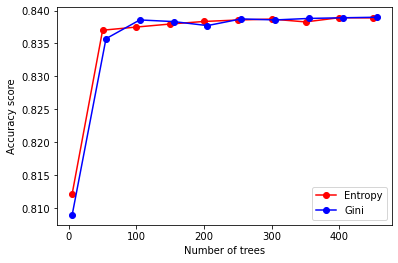

In [32]:
lonelyx=np.array([5])
newx=np.append(lonelyx,x)

lonelyy=np.array([score0])
newy=np.append(lonelyy,y)
newy

plt.plot(newx,newy,'ro-',label='Entropy')
plt.plot(x0,y0,'bo-',label='Gini')


plt.legend()
plt.xlabel('Number of trees')
plt.ylabel('Accuracy score')

## Comparing the different datasets

Random forests are performed using the data substituting the -999 values with zeros, the most frequent data and the mean value of its corresponding colummn 

In [28]:
Random_Forest_model = RandomForestClassifier(n_estimators=200,criterion="entropy",max_depth=10)
Random_Forest_model.fit(mf_X_train_sc, mf_y_train)
print("Test set accuracy with Random forest, mf and scaled data: {:.5f}".format(Random_Forest_model.score(mf_X_test_sc,mf_y_test)), 'and train set accuracy{:.5f}'.format(Random_Forest_model.score(mf_X_train_sc,mf_y_train)))

Random_Forest_model = RandomForestClassifier(n_estimators=200,criterion="entropy",max_depth=10)
Random_Forest_model.fit(mean_X_train_sc, mean_y_train)
print("Test set accuracy with Random forest, mean and scaled data: {:.5f}".format(Random_Forest_model.score(mean_X_test_sc,mean_y_test)),'and train set accuracy:{:.5f}'.format(Random_Forest_model.score(mean_X_train_sc,mean_y_train)))

Random_Forest_model = RandomForestClassifier(n_estimators=200,criterion="entropy",max_depth=10)
Random_Forest_model.fit(zero_X_train_sc, zero_y_train)
print("Test set accuracy with Random forest, zero and scaled data: {:.5f}".format(Random_Forest_model.score(zero_X_test_sc,zero_y_test)),'and train set accuracy:{:.5f}'.format(Random_Forest_model.score(zero_X_train_sc,zero_y_train)))

Test set accuracy with Random forest, mf and scaled data: 0.83039 and train set accuracy0.83885
Test set accuracy with Random forest, mean and scaled data: 0.82768 and train set accuracy:0.83622
Test set accuracy with Random forest, zero and scaled data: 0.82790 and train set accuracy:0.83623


## Checking the ideal number of trees

Using the "zero" dataset, the train and test accuracy are compared for different maximun trees depth

In [69]:
n=25
depth=np.zeros(n)
train=np.zeros(n)
test=np.zeros(n)

for i in range(1,n):
    Random_Forest_model = RandomForestClassifier(n_estimators=100,criterion="entropy",max_depth=i)
    Random_Forest_model.fit(zero_X_train_sc, zero_y_train)
    depth[i]=i
    test[i]=Random_Forest_model.score(zero_X_test_sc,zero_y_test)
    train[i]=Random_Forest_model.score(zero_X_train_sc,zero_y_train)
    

Text(0, 0.5, 'Accuracy score')

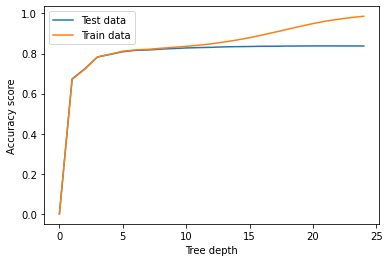

In [75]:
plt.plot(depth,test,label='Test data')
plt.plot(depth,train,label='Train data')
plt.legend()
plt.xlabel('Tree depth')
plt.ylabel('Accuracy score')

## Comparing for different number of jets

Random forests are performed separately for events with 0, 1, 2 and 3 jets

In [29]:
X_j0_train=np.array(zero_data_train[zero_data_train['PRI_jet_num']==0].drop(['Label','KaggleSet','PRI_jet_num'],axis=1))
y_j0_train=bs_bool(np.array(zero_data_train[zero_data_train['PRI_jet_num']==0]['Label']))
X_j0_test=np.array(zero_data_test[zero_data_test['PRI_jet_num']==0].drop(['Label','KaggleSet','PRI_jet_num'],axis=1))
y_j0_test=bs_bool(np.array(zero_data_test[zero_data_test['PRI_jet_num']==0]['Label']))

X_j1_train=np.array(zero_data_train[zero_data_train['PRI_jet_num']==1].drop(['Label','KaggleSet','PRI_jet_num'],axis=1))
y_j1_train=bs_bool(np.array(zero_data_train[zero_data_train['PRI_jet_num']==1]['Label']))
X_j1_test=np.array(zero_data_test[zero_data_test['PRI_jet_num']==1].drop(['Label','KaggleSet','PRI_jet_num'],axis=1))
y_j1_test=bs_bool(np.array(zero_data_test[zero_data_test['PRI_jet_num']==1]['Label']))



X_j2_train=np.array(zero_data_train[zero_data_train['PRI_jet_num']==2].drop(['Label','KaggleSet','PRI_jet_num'],axis=1))
y_j2_train=bs_bool(np.array(zero_data_train[zero_data_train['PRI_jet_num']==2]['Label']))
X_j2_test=np.array(zero_data_test[zero_data_test['PRI_jet_num']==2].drop(['Label','KaggleSet','PRI_jet_num'],axis=1))
y_j2_test=bs_bool(np.array(zero_data_test[zero_data_test['PRI_jet_num']==2]['Label']))

X_j3_train=np.array(zero_data_train[zero_data_train['PRI_jet_num']==3].drop(['Label','KaggleSet','PRI_jet_num'],axis=1))
y_j3_train=bs_bool(np.array(zero_data_train[zero_data_train['PRI_jet_num']==3]['Label']))
X_j3_test=np.array(zero_data_test[zero_data_test['PRI_jet_num']==3].drop(['Label','KaggleSet','PRI_jet_num'],axis=1))
y_j3_test=bs_bool(np.array(zero_data_test[zero_data_test['PRI_jet_num']==3]['Label']))


In [30]:
Random_Forest_model = RandomForestClassifier(n_estimators=100,criterion="entropy",max_depth=10)
Random_Forest_model.fit(X_j0_train, y_j0_train)
print("Test set accuracy with j0: {:.5f}".format(Random_Forest_model.score(X_j0_test, y_j0_test)),'and train set accuracy: {:.5f}'.format(Random_Forest_model.score(X_j0_train, y_j0_train)))

Random_Forest_model = RandomForestClassifier(n_estimators=100,criterion="entropy",max_depth=10)
Random_Forest_model.fit(X_j1_train, y_j1_train)
print("Test set accuracy with j1: {:.5f}".format(Random_Forest_model.score(X_j1_test, y_j1_test)),'and train set accuracy: {:.5f}'.format(Random_Forest_model.score(X_j1_train, y_j1_train)))

Random_Forest_model = RandomForestClassifier(n_estimators=100,criterion="entropy",max_depth=10)
Random_Forest_model.fit(X_j2_train, y_j2_train)
print("Test set accuracy with j2: {:.5f}".format(Random_Forest_model.score(X_j2_test, y_j2_test)),'and train set accuracy: {:.5f}'.format(Random_Forest_model.score(X_j2_train, y_j2_train)))

Random_Forest_model = RandomForestClassifier(n_estimators=100,criterion="entropy",max_depth=10)
Random_Forest_model.fit(X_j3_train, y_j3_train)
print("Test set accuracy with j3: {:.5f}".format(Random_Forest_model.score(X_j3_test, y_j3_test)),'and train set accurac {:.5f}'.format(Random_Forest_model.score(X_j3_train, y_j3_train)))


Test set accuracy with j0: 0.84588 and train set accuracy: 0.85990
Test set accuracy with j1: 0.80627 and train set accuracy: 0.82339
Test set accuracy with j2: 0.84412 and train set accuracy: 0.86961
Test set accuracy with j3: 0.84146 and train set accurac 0.88396


## Confusion matrix

We plot the confusion matrix for the 'zero data'

In [58]:
Random_Forest_model = RandomForestClassifier(n_estimators=200,criterion="entropy")
Random_Forest_model.fit(X_j3_train, y_j3_train)


RandomForestClassifier(criterion='entropy', n_estimators=200)

In [59]:
y_pred = Random_Forest_model.predict(X_j3_test)

<AxesSubplot:>

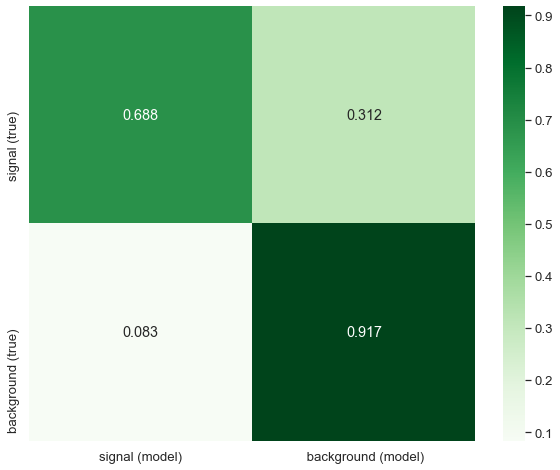

In [60]:

confmat = confusion_matrix(y_j3_test, y_pred, labels = [1,0], normalize='true')

cm = pd.DataFrame(confmat,
                  index = ['signal (true)' , 'background (true)'], 
                  columns = ['signal (model)', ' background (model)'])
plt.figure(figsize=[10,8])

sns.set(font_scale=1.2)
sns.heatmap(cm, cmap='Greens', linecolor = 'black', annot = True, fmt='.3f')
